### 
Intro

Consuming content in 2021 is a non-negotiable. Even if a person is not subscribed to an OTT service, doesn't watch TV but has an internet connection, they are most likely going to be subject to content that. Most of the new content we consume obviously is not random. It is a product of running several Unsupervised learning techniques over several diverse and unapparent variables. 

In recommending movies, OTT platforms such as Netflix, Prime Video and Disney+ use hundreds of variables to suggest the movies that a user might find to be to his liking. 

Some variables that might not seem useful but can provide several insights into preference prediciton are
- Lenght of the movie
- Content
- Genre
- Dialogue Writer
- Film Colour
- Era (for Period films)
- Director
- Rating
..and many many more.

Objective

The objective of this project is to create a base recommendation model using different techniques which take into account genre, age, director, description and actors.

We will be using the following techniques

- Demographic Filtering
- Content Based Filtering
- Collaborative Filtering

Demographic Filtering : This technique is basic and will recommend movies based on simple user based variables such as age.

Content Based Filtering : This technique suggests similar items based on a variable. We use metadata, such as genre, director, description, actors, etc. for movies, to make these recommendations. If a person liked a particular item, for instance a movie directed by Christopher Nolan, the filtering technique wil suggest movies accordingly.
One suggestion could be other Chris Nolan movies, while others could be movide directed by individuals who are similar to Chris Nolan.

Collaborative Filtering : This filtering technique will consider the ratings data and suggest movies based on similarity between movies or users. 

Next Steps

In this submission, we have done basic EDA on the datasets we are planning to use. We have performed data cleaning, data wrangling and some feature extraction. 

The next steps would be to

- Determine metrics for content filtering
- Perform Matrix Factorization for Collaboartive Filtering using SVD
- Decide on demographics 
- Perform basic text analytics to identify keywords and map them to genres or ratings


In [1]:
from IPython.display import Image, HTML
import json
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [2]:
os.getcwd()


'/Users/sushcha/Desktop/AMPBA/Term4-MLUL2/MLUL2_Assignment'

In [3]:
md = pd.read_csv('movies_metadata.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
md.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [5]:
md.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

### Features

adult: Rating of the Movie

belongs_to_collection: Movie collection in case of franchise

budget

genres

homepage

id

imdb_id: The IMDB ID of the movie.

original_language

original_title

overview: A synopsys

popularity: TMDB score

poster_path

production_companies: Companies involved in production

production_countries: Countries the movie was poroduced

release_date

revenue

runtime

spoken_languages

status

tagline

title

video

vote_average: average rating

vote_count: vote count

#### Our recommendation system will factor in features such as genre, production_companies, rating, tmdb rating

## Checking types and cleaning data

In [6]:
md.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [7]:
md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

#### The info command gives the number of entries in the dataframe  in each feature.
#### As expected, we can see that the 'belongs_to_collection' feature has several missing values since it is rare for a movie to be part of a collection.
#### Homepage feature also displays several missing values as expected. 
#### Apart from these feautures, we can confidently say this is a dense dataset and can be used efficiently. 


## Cleaning columns

#### In the features specified above, we can observe some redundant features such as title and original title. Let's explaore further.

In [8]:
chk = md[md['original_title'] != md['title']]

In [9]:
chk[['title', 'original_title', 'original_language']].head()

,title,original_title,original_language
28,The City of Lost Children,La Cité des Enfants Perdus,fr
29,Shanghai Triad,摇啊摇，摇到外婆桥,zh
32,Wings of Courage,"Guillaumet, les ailes du courage",fr
57,The Postman,Il postino,it
58,The Confessional,Le confessionnal,fr


#### We can see that the original title is to specify the name of the movie in it's native language.
#### Since we have the original_language feature available to us, we can drop this feature before going ahead.

In [10]:
md = md.drop(['original_title'], axis=1)

#### We also observe that there are 2 id columns in the dataframe. We do not need the imdb_id since we have an identifier.

In [11]:
md = md.drop(['imdb_id'], axis=1)

In [12]:
md.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


#### The most of the entries in the revenue column in the dataframe are 'zero'.

In [13]:
all_col = md.columns

In [14]:
for col in all_col:
    print("Column " + col + str(md[col].value_counts()))

Column adultFalse                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64
Column belongs_to_collection{'id': 415931, 'name': 'The Bowery Boys', 'poster_path': '/q6sA4bzMT9cK7EEmXYwt7PNrL5h.jpg', 'backdrop_path': '/foe3kuiJmg5AklhtD3skWbaTMf2.jpg'}                   29
{'id': 421566, 'name': 'Totò Collection', 'poster_path': '/4ayJsjC3djGwU9eCWUokdBWvdLC.

Column poster_path/5D7UBSEgdyONE6Lql6xS7s6OLcW.jpg    5
/2kslZXOaW0HmnGuVPCnQlCdXFR9.jpg    4
/qW1oQlOHizRHXZQrpkimYr0oxzn.jpg    4
/cdwVC18URfEdQjjxqJyRMoGDC0H.jpg    3
/8VSZ9coCzxOCW2wE2Qene1H1fKO.jpg    3
                                   ..
/gCGoMZXGdU7DY8xgKYle6dJGksT.jpg    1
/xIhTlM1qJ8DguQqUQd4TIIUST90.jpg    1
/aNdLEAK48fjVPk9r6Ei6r90Itgz.jpg    1
/gDyB4wM5YkHZQqVg6UBSFoSaej6.jpg    1
/87Nj4vIQu0glNAevHrJ9mqtOfWK.jpg    1
Name: poster_path, Length: 45024, dtype: int64
Column production_companies[]                                                                                                                                      11875
[{'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]                                                                                       742
[{'name': 'Warner Bros.', 'id': 6194}]                                                                                                    540
[{'name': 'Paramount Pictures', 'id': 4}]                       

#### We can see the adult column has only 9 entries. We can disregard this feature altogether.

In [15]:
md = md.drop(['adult'], axis=1)

In [16]:
lang_frame = pd.DataFrame(md['original_language'].value_counts())
#lang_df['language'] = lang_df.index
#lang_df.columns = ['number', 'language']
#lang_df.head()

In [17]:
lang_frame.head()
lang_frame['language'] = lang_frame.index
lang_frame.columns = ['number', 'language']

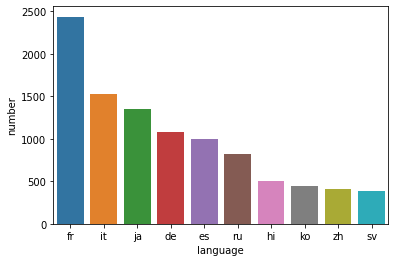

In [18]:
sns.barplot(x='language', y='number', data=lang_frame.iloc[1:11])
plt.show()

#### There is also a high chance of users liking movies from a certain time period e.g 90s, 80s etc. It would make sense to extract this information as features to use in our analysis.

In [19]:
md.release_date = pd.to_datetime(md.release_date,  errors='coerce')
md['Year'] = md.release_date.dt.year
md['Month'] = md.release_date.dt.month
md['Day'] = md.release_date.dt.weekday

In [20]:
md.head()

,belongs_to_collection,budget,genres,homepage,id,original_language,overview,popularity,poster_path,production_companies,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,Year,Month,Day
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,en,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1995.0,10.0,0.0
1,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,en,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995.0,12.0,4.0
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,en,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,1995.0,12.0,4.0
3,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,1995.0,12.0,4.0
4,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,en,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,1995.0,2.0,4.0


In [21]:
md.corr()

,revenue,runtime,vote_average,vote_count,Year,Month,Day
revenue,1.000000,0.103917,0.083868,0.812022,0.088355,0.031632,-0.036784
runtime,0.103917,1.000000,0.158146,0.113539,0.078822,0.063567,0.011982
vote_average,0.083868,0.158146,1.000000,0.123607,0.026138,0.045267,-0.003881
vote_count,0.812022,0.113539,0.123607,1.000000,0.106789,0.033998,-0.039511
Year,0.088355,0.078822,0.026138,0.106789,1.000000,-0.017093,0.018580
Month,0.031632,0.063567,0.045267,0.033998,-0.017093,1.000000,-0.003277
Day,-0.036784,0.011982,-0.003881,-0.039511,0.018580,-0.003277,1.000000


#### As we can see, there is a high correlation between vote_count and revenue. This could be a crucial metric to consider when conducting analysis. 

## Dataset for Matrix Factorization

#### We will be using the ratings dataset to recommend movies through collaborative filtering and Matrix Fatorization
#### using SVD from the Surprise package.

In [22]:
rates = pd.read_csv('ratings_small.csv')

In [23]:
rates.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [24]:
rates.isna().count()

userId       100004
movieId      100004
rating       100004
timestamp    100004
dtype: int64

In [25]:
rates.shape

(100004, 4)

#### The rating dataset seems to be complete. We do not need to clean or fill any missing values right now. 

In [26]:
md.head()

,belongs_to_collection,budget,genres,homepage,id,original_language,overview,popularity,poster_path,production_companies,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,Year,Month,Day
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,en,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1995.0,10.0,0.0
1,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,en,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995.0,12.0,4.0
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,en,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,1995.0,12.0,4.0
3,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,1995.0,12.0,4.0
4,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,en,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,1995.0,2.0,4.0


In [27]:
md["popularity"] = pd.to_numeric(md["popularity"], errors='coerce')

In [28]:
md["popularity"].isna().count()

45466

In [29]:
foo = md['original_language'].value_counts()

print(foo)

en      32269
fr       2438
it       1529
ja       1350
de       1080
        ...  
tg          1
82.0        1
si          1
uz          1
jv          1
Name: original_language, Length: 92, dtype: int64


In [30]:
md['original_language'].nunique()

92

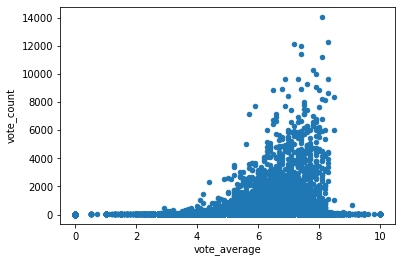

In [31]:
md.plot.scatter('vote_average', 'vote_count')

#### There is certainly a definite trend between number of votes cast and the rating for the movie after the 4 points mark. This can be used to explain that the movies with low ratings are truly disliked by all, while the popular movies might have a better rating due to the number of votes cast.
#### We can use this insight in ensuring we have an equal amount of movies ranked below 4 and above 4 in our recommendation system to avoid bias.


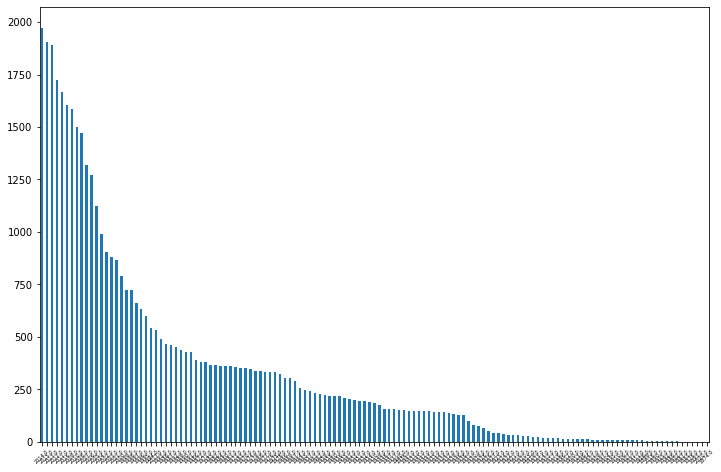

In [32]:
plt.figure(figsize=(12,8))
md['Year'].value_counts().plot.bar()
plt.xticks(rotation=45, fontsize = 5)
plt.show()

In [33]:
ninf = md.groupby('Year')['vote_count'].sum()

In [34]:
ninf = ninf.reset_index()

In [35]:
ninf.columns

Index(['Year', 'vote_count'], dtype='object')

In [36]:
ninf.head()
#ninf.drop('index', axis=1, inplace=True)

,Year,vote_count
0,1874.0,19.0
1,1878.0,25.0
2,1883.0,7.0
3,1887.0,17.0
4,1888.0,43.0


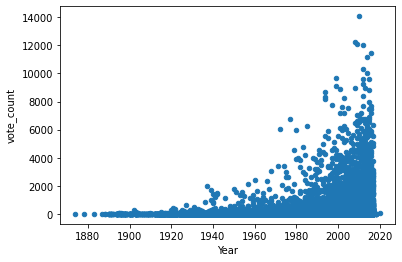

In [37]:
md.plot.scatter('Year', 'vote_count')

#### We can also observe that the number of votes has steadily increased for movies being made more recently. This needs to be factored into our analysis and recommendations. Splitting the data without considering this will make our test and training data skewed and hence biased.

In [38]:
rates.head()


,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [39]:
md.head()
rates.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [40]:
#Importing the credits database
cred = pd.read_csv("credits.csv")

In [41]:
cred.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [42]:
rates.columns = ['user_id', 'id', 'rating', 'timestamp']

In [43]:
rates.dtypes

user_id        int64
id             int64
rating       float64
timestamp      int64
dtype: object

In [44]:
md[md['id'] == '1997-08-20']
#md['id'].unique()

,belongs_to_collection,budget,genres,homepage,id,original_language,overview,popularity,poster_path,production_companies,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,Year,Month,Day
19730,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,104.0,Released,NaN,Midnight Man,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
md2 = md[~md['id'].str.contains('-')]

In [46]:
md2['id'] = md2['id'].astype(str).astype(int)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
md2.dtypes

belongs_to_collection            object
budget                           object
genres                           object
homepage                         object
id                                int64
original_language                object
overview                         object
popularity                      float64
poster_path                      object
production_companies             object
production_countries             object
release_date             datetime64[ns]
revenue                         float64
runtime                         float64
spoken_languages                 object
status                           object
tagline                          object
title                            object
video                            object
vote_average                    float64
vote_count                      float64
Year                            float64
Month                           float64
Day                             float64
dtype: object

In [48]:
#md2 = md2.merge(rates, on='id')

In [49]:
md2.columns

Index(['belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'original_language', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'video', 'vote_average', 'vote_count', 'Year', 'Month', 'Day'],
      dtype='object')

In [50]:
md2 = md2.merge(cred, on='id')

In [51]:
md2.head()

,belongs_to_collection,budget,genres,homepage,id,original_language,overview,popularity,poster_path,production_companies,...,tagline,title,video,vote_average,vote_count,Year,Month,Day,cast,crew
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]",...,NaN,Toy Story,False,7.7,5415.0,1995.0,10.0,0.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,en,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",...,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995.0,12.0,4.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,en,A family wedding reignites the ancient feud be...,11.712900,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",...,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,1995.0,12.0,4.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,...,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,1995.0,12.0,4.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,en,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...",...,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,1995.0,2.0,4.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."


In [52]:
#Demographic Filtering

In [53]:
#This system is a simple method to reccomend the most popular movies to all audiences. 
#For this, we will have to come up with a metric for popularity.
#IMDB weighted rating is a good metric for out purpose

In [54]:
#Weighted Rating = (v/v+m).R + (m/v+m).C

#num_votes = number of votes for the movie (v)
#min_vote = minimum votes required to be considered as a popular movie (m)
#ave_rate = Average Rating of the movie (R)
#vote_ave = Mean vote across movies (C)


In [55]:
vote_ave = md2['vote_average'].mean()

In [56]:
vote_ave

5.61823212913114

In [57]:
#next we have to determine an appropriate value for m
#We can consider the top 20% movies by vote count

min_vote = md2['vote_count'].quantile(0.9)

In [58]:
min_vote

160.0

In [59]:
#Let's filter movies based on m
qual_movies = md2[md2['vote_count'] > min_vote]

In [60]:
qual_movies['id'].nunique()

4534

In [61]:
#We have 152 movies that qualify.
#Let's calculate popularity of each movie using the below formula

#Weighted Rating = (v/v+m).R + (m/v+m).C

def get_weighted(x, min_vote=min_vote, vote_ave = vote_ave):
    num_votes = x['vote_count']
    ave_rate = x['vote_average']
    return ((num_votes/num_votes+min_vote)*ave_rate) + ((min_vote/num_votes+min_vote)*vote_ave)

In [62]:
qual_movies['pop'] = qual_movies.apply(get_weighted, axis=1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [63]:
qual_movies.head()

,belongs_to_collection,budget,genres,homepage,id,original_language,overview,popularity,poster_path,production_companies,...,title,video,vote_average,vote_count,Year,Month,Day,cast,crew,pop
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]",...,Toy Story,False,7.7,5415.0,1995.0,10.0,0.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",2138.783146
1,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,en,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",...,Jumanji,False,6.9,2413.0,1995.0,12.0,4.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",2010.189672
4,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,en,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...",...,Father of the Bride Part II,False,5.7,173.0,1995.0,2.0,4.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",1821.813193
5,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,en,"Obsessive master thief, Neil McCauley leads a ...",17.924927,/zMyfPUelumio3tiDKPffaUpsQTD.jpg,"[{'name': 'Regency Enterprises', 'id': 508}, {...",...,Heat,False,7.7,1886.0,1995.0,12.0,4.0,"[{'cast_id': 25, 'character': 'Lt. Vincent Han...","[{'credit_id': '52fe4292c3a36847f802916d', 'de...",2139.093767
8,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,en,International action superstar Jean Claude Van...,5.231580,/eoWvKD60lT95Ss1MYNgVExpo5iU.jpg,"[{'name': 'Universal Pictures', 'id': 33}, {'n...",...,Sudden Death,False,5.5,174.0,1995.0,12.0,4.0,"[{'cast_id': 1, 'character': 'Darren Francis T...","[{'credit_id': '52fe44dbc3a36847f80ae0f1', 'de...",1789.583331


In [64]:
final_demo = qual_movies.sort_values(by='pop')

In [65]:
final_demo.head()

,belongs_to_collection,budget,genres,homepage,id,original_language,overview,popularity,poster_path,production_companies,...,title,video,vote_average,vote_count,Year,Month,Day,cast,crew,pop
13620,NaN,100000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,14164,en,The young warrior Son Goku sets out on a quest...,8.876305,/yERkcVylXAcTCi8f0qrba4rmWwg.jpg,"[{'name': 'Ingenious Film Partners', 'id': 289...",...,Dragonball Evolution,False,2.9,475.0,2009.0,4.0,2.0,"[{'cast_id': 17, 'character': 'Master Roshi', ...","[{'credit_id': '52fe45d29251416c75063b05', 'de...",1367.709598
3482,NaN,44000000,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",NaN,5491,en,"In the year 3000, man is no match for the Psyc...",5.276926,/neMUscYddxr4cP8wnRHRMLcWS0A.jpg,"[{'name': 'Franchise Pictures', 'id': 1403}, {...",...,Battlefield Earth,False,3.0,259.0,2000.0,5.0,2.0,"[{'cast_id': 11, 'character': 'Terl', 'credit_...","[{'credit_id': '52fe4409c3a36847f807e759', 'de...",1385.387863
12955,NaN,25000000,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",http://www.disastermovie.net/,13805,en,"In DISASTER MOVIE, the filmmaking team behind ...",11.634132,/6xBrOsf8RtHem3diXDGFsiKltYz.jpg,"[{'name': 'Grosvenor Park Media Ltd.', 'id': 2...",...,Disaster Movie,False,3.1,250.0,2008.0,8.0,4.0,"[{'cast_id': 5, 'character': 'Will', 'credit_i...","[{'credit_id': '52fe45a39251416c7505d4ab', 'de...",1401.612809
9687,"{'id': 149704, 'name': 'Alone in the Dark Coll...",20000000,"[{'id': 28, 'name': 'Action'}, {'id': 14, 'nam...",NaN,12142,en,Edward Carnby is a private investigator specia...,5.871243,/3HsprIjUEwYfnlEf7jumGm037Bk.jpg,[{'name': 'Boll Kino Beteiligungs GmbH & Co. K...,...,Alone in the Dark,False,3.1,174.0,2005.0,1.0,4.0,"[{'cast_id': 12, 'character': 'Edward Carnby',...","[{'credit_id': '52fe44bd9251416c7503f4f1', 'de...",1403.183331
11602,NaN,20000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9760,en,"When Edward, Peter, Lucy and Susan each follow...",5.549609,/b4iOOIzR19TnqtUEetXBFxJ54YV.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,...,Epic Movie,False,3.2,334.0,2007.0,1.0,3.0,"[{'cast_id': 1, 'character': 'Edward', 'credit...","[{'credit_id': '56348a269251412857016e9e', 'de...",1416.808509


In [66]:
#Content Based Recommendation
#On Overview
#In this type of recommender, we use the metadata in each observed movie to match it with similar movies in the dataset.
#For instance, if the word 'Batman' or 'Thriller' appear in the overview of 2 movies, their similarity score will be 
#higher than that of 2 movies without 2 matching words. 
#To start of, we want to make sure the words are significant and not fillers. Removing stop words will help.

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel


In [68]:
#Initializing the tfidf and specifying to remove all stop words
tfidf = TfidfVectorizer(stop_words='english')

In [69]:
md2['overview'] = md2['overview'].fillna('')


In [70]:
tfmatrix = tfidf.fit_transform(md2['overview'])
#Here the tfidif method takes the overview column and creates a tfidf matrix 

In [71]:
tfmatrix

<45538x75827 sparse matrix of type '<class 'numpy.float64'>'
	with 1213008 stored elements in Compressed Sparse Row format>

In [72]:
cossim = linear_kernel(tfmatrix, tfmatrix)
#The cosine similarity matrix computes a crosstab table that matches each movie to every other movie. 


In [73]:
cossim.shape

(45538, 45538)

In [74]:
#In order to recommend movies based on an input movie, we will need a way to derive the inde given the title.
md2.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            45528, 45529, 45530, 45531, 45532, 45533, 45534, 45535, 45536,
            45537],
           dtype='int64', length=45538)

In [75]:
indc = pd.Series(md2.index, index=md2['title']).drop_duplicates()

In [76]:
#indc gives us the index given the title
indc

title
Toy Story                          0
Jumanji                            1
Grumpier Old Men                   2
Waiting to Exhale                  3
Father of the Bride Part II        4
                               ...  
Subdue                         45533
Century of Birthing            45534
Betrayal                       45535
Satan Triumphant               45536
Queerama                       45537
Length: 45538, dtype: int64

In [77]:
def movie_recommend(movie_name, cosine_sim=cossim):
    #Use the reverse index and get the index of the movie specified
    index = indc[movie_name]
    
    #Get the pairwsie similarity scores of all movies with that movie and sort to display 20 top movies
    similarity = list(enumerate(cosine_sim[index]))
    similarity = sorted(similarity, key=lambda x: x[1], reverse=True)
    similarity = similarity[1:21]
    #We have the indexes for the top 20 recommendations.
    #Now, we use the reverse index to get the names of the sorted indexes
    movies_id = [i[0] for i in similarity]
    return md2['title'].iloc[movies_id]

In [78]:
movie_recommend('Waiting to Exhale')

26679       I Don't Buy Kisses Anymore
27421                Robin of Locksley
34968               Starring Adam West
36009                  Poil de Carotte
41492                           Hunted
24660                       Chatterbox
43501    Robin Williams - Off the Wall
19071                           Bernie
28291                The Boy Next Door
2149                              Hero
18321                Intimate Lighting
35989           Harlem Rides the Range
5385                  Robin and Marian
13238                           Waiter
36747               Paraguayan Hammock
31963               The Lazarus Papers
19850                         I Accuse
37856                    White Bondage
39965                          Respire
4574            Weekend at Bernie's II
Name: title, dtype: object

In [79]:
#This method gives us the recommendation based on computed cosine similarity.

(45538, 26)

In [80]:
#Collaborative Filtering
#So far we have only compared the description of each movie and suggested based on keywords. This approach is not ideal.
#As content consumers, we would like the be shown movies by computing a similarity between users. This is done by 
#matching users and the rating they have provided. 

#Hoever, before we go ahead and apply collaborative filtering to recommend movies according to ratings, we will need to address
#the issue of missing ratings.
#It is unreasonable to expect every user to have rated every movie in our list.
#There are bound to be missing values. We will counter this with a latent factor model that computes the 
#similarity between users and movies.

#To build a collaborative filter, we will use the surprise package

In [81]:
conda install -c conda-forge scikit-surprise

In [82]:
from surprise import Reader, Dataset, SVD
#We will use the scikit-surprise package to first compute missing ratings using SVD and then run an SVD on all movies
#based on the user ID specified. 
#For instance, we want to see the best recommended movies for user 1. We will use svd to predict the rating user 1
#would give all the other movies. Then, we will simply sort these movies based on the ratings.
#The recommender uses collaborative filtering as it computes rating based on ratings given by other users and similarity
#between 2 users.

In [83]:
reader = Reader()

In [84]:
ratings = pd.read_csv('ratings_small.csv')
#we use the ratings dataframe for this task as we need the rating each user has given.

In [85]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [86]:
from surprise.model_selection import cross_validate

In [87]:
data = Dataset.load_from_df(ratings[['userId','movieId', 'rating']], reader)

In [88]:
svd = SVD()

In [89]:
cross_validate(svd, data, measures=['RMSE','MAE'], cv=5)
#The RMSE is at 0.9 which is great. This means there is not too much ambiguity in the similarity of users. This can
#be attributed to an extensive and thorough dataset.

{'test_rmse': array([0.8928839 , 0.89603559, 0.90553658, 0.90109488, 0.89204716]),
 'test_mae': array([0.68629054, 0.69174834, 0.6989022 , 0.69308315, 0.68738132]),
 'fit_time': (6.706066846847534,
  5.928791046142578,
  6.224008798599243,
  7.275406837463379,
  6.6042160987854),
 'test_time': (0.45285797119140625,
  0.17884016036987305,
  0.29410791397094727,
  0.27699708938598633,
  0.6935288906097412)}

In [90]:
trainset = data.build_full_trainset()

In [91]:
svd.fit(trainset)
#Lets fit the svd and then predict the rating of a certain movies our user in question would give.

In [92]:
svd.predict(1, 302)

Prediction(uid=1, iid=302, r_ui=None, est=2.7296881727861346, details={'was_impossible': False})

In [ ]:
#The prediction predicts that user with id 1 would have a predicted rating of 2.7 for movie id 302

In [160]:
#Let's run this for the first 500 movies. Disclaimer - This is not the most efficient technique and hence we are only 
#using the top 500
movielist = md2['id']
movielist = list(movielist)
movielist = movielist[:500]
#recommended = pd.DataFrame(columns=['Name', 'Rating'])
newDF = pd.DataFrame(columns=['Name', 'Rating'])

In [161]:
def get_rec(userid, id_list):
    for i in id_list:
        temp_rating = svd.predict(userid, i).est
        name = md2[md2['id'] == i]['title']
        for item in name.iteritems():
            temp_name = item[1]
        #print(temp_name, temp_rating)
        newDF.loc[len(newDF.index)] = [temp_name, temp_rating]

In [ ]:
get_rec(1, movielist)

In [163]:
newDF.sort_values('Rating', ascending = False)

,Name,Rating
278,Nell,3.421144
415,Beverly Hills Cop III,3.294416
334,While You Were Sleeping,3.236059
459,Hard Target,3.185227
286,Once Were Warriors,3.075798
...,...,...
61,Mr. Holland's Opus,2.047602
312,Stargate,2.019417
103,The Bridges of Madison County,1.998637
81,Antonia's Line,1.827800


In [ ]:
#We get the top 10 movies recommended to user 1 using the svd predict. 